## Importing modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

## Loading Data and Preprocessing

In [2]:
# Loading the data
#from sklearn.datasets import load_digits
#from tensorflow.keras.utils import to_categorical
#digits = load_digits()
#images = digits.images
#targets = digits.target
#targets_categorical = to_categorical(targets, num_classes=10)

In [3]:
# Loading the data 
from sklearn.datasets import fetch_olivetti_faces
from tensorflow.keras.utils import to_categorical
data = fetch_olivetti_faces()
images = data.images
targets = data.target
targets_categorical = to_categorical(targets, num_classes=40)

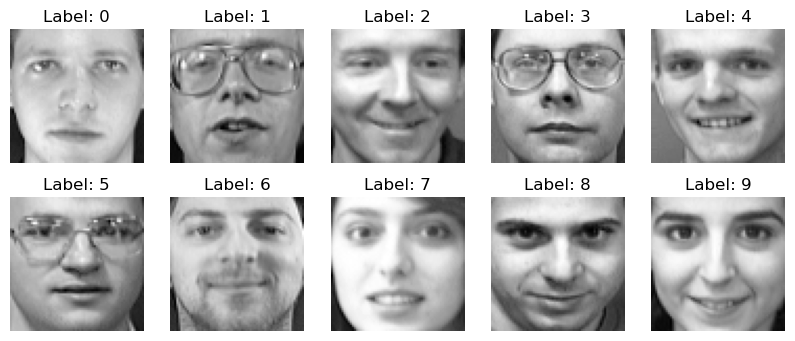

In [4]:
# Visualising our data
plt.figure(figsize=(10, 4))

# Display the first 10 images along with their target labels
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(images[i*10], cmap='gray')
    plt.title(f"Label: {targets[i*10]}")
    plt.axis('off')


In [5]:
# Preprocessing
# Adding dimension to images
images = np.expand_dims(images, axis=-1)  


In [6]:
from sklearn.model_selection import train_test_split
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(
    images, targets_categorical, test_size=0.2, random_state=42
)

In [7]:
# Get image shape
IMG_SHAPE = images[0].shape
print(IMG_SHAPE)

(64, 64, 1)


## Creating a CNN model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE, name="conv2d_1"))
model.add(MaxPooling2D(name="maxPooling_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv2d_2"))
model.add(MaxPooling2D(name="maxPooling_2"))
model.add(Conv2D(128, (3, 3), activation='relu', name="conv2d_3"))
model.add(MaxPooling2D(name="maxPooling_3"))
model.add(Flatten(name="flatten"))
model.add(Dense(40, activation='softmax', name="dense"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 maxPooling_1 (MaxPooling2D)  (None, 31, 31, 32)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 maxPooling_2 (MaxPooling2D)  (None, 14, 14, 64)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 maxPooling_3 (MaxPooling2D)  (None, 6, 6, 128)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0

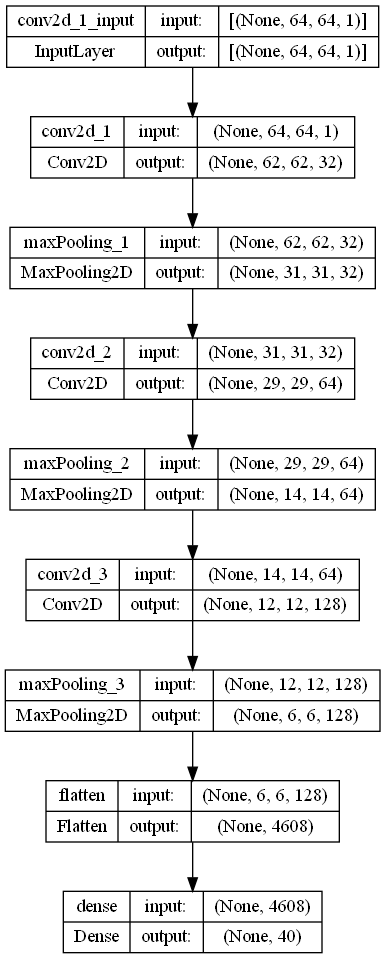

In [10]:
# Visualize the CNN
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,  
    batch_size=32,
    verbose=1
)

Epoch 1/20
10/10 [==============================] - 2s 103ms/step - loss: 3.7205 - accuracy: 0.0219 - val_loss: 3.6955 - val_accuracy: 0.0125
Epoch 2/20
10/10 [==============================] - 1s 63ms/step - loss: 3.6895 - accuracy: 0.0219 - val_loss: 3.7066 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 1s 73ms/step - loss: 3.6815 - accuracy: 0.0250 - val_loss: 3.7408 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 1s 72ms/step - loss: 3.6782 - accuracy: 0.0312 - val_loss: 3.8026 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 1s 72ms/step - loss: 3.6687 - accuracy: 0.0375 - val_loss: 3.7477 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 1s 69ms/step - loss: 3.6514 - accuracy: 0.0469 - val_loss: 3.7726 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 1s 65ms/step - loss: 3.5973 - accuracy: 0.0656 - val_loss: 3.7060 - val_accuracy:

## Testing the model

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

3/3 [==============================] - 0s 18ms/step - loss: 0.1755 - accuracy: 0.9500
Test Loss: 0.17550024390220642
Test Accuracy: 0.949999988079071


# Next Steps
    - Monday (Finish the code) 
    - Wesdesnday (Start writing)

## Visualize feature maps

In [14]:
# Get list of layers from model
print(IMG_SHAPE)
layer_outputs = [layer.output for layer in model.layers[:]]
conv_layers = [layer for layer in model.layers if 'conv2d' in layer.name]

# Create a visualization model
visualize_model = Model(inputs=model.input, outputs=layer_outputs)

# Get image 
img = X_train[0].reshape((1,64,64,1))
print(img.shape)

# Get feature maps
feature_maps = visualize_model.predict(img)
# Get layer names 
layer_names = [layer.name for layer in model.layers]

(64, 64, 1)
(1, 64, 64, 1)
1/1 [==============================] - 0s 160ms/step


C:\Users\idris\AppData\Local\Temp\ipykernel_12928\1960228903.py:9: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


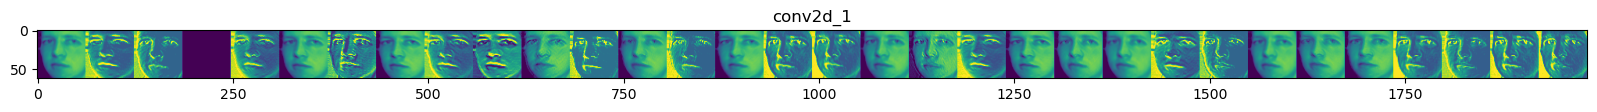

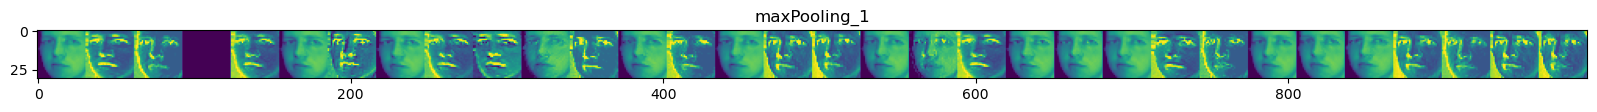

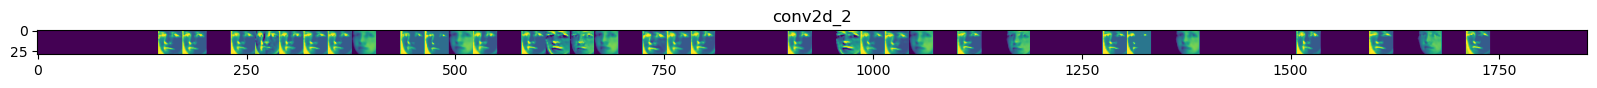

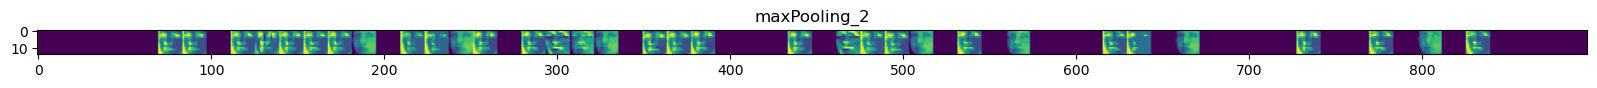

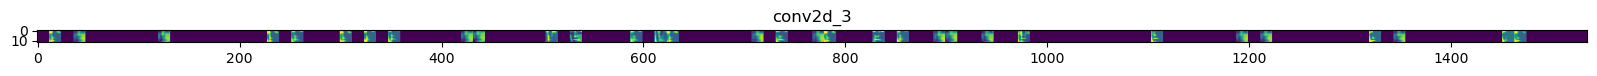

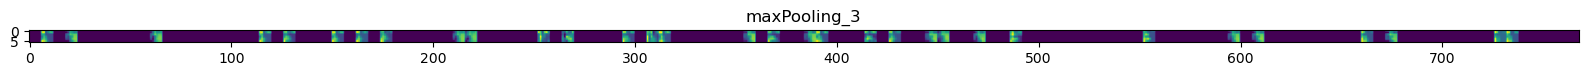

In [15]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    if(len(feature_map.shape) == 4):
        channels = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size*channels))
        for i in range(channels):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We tile each filter into a big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / channels
        plt.figure(figsize=(scale*channels, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


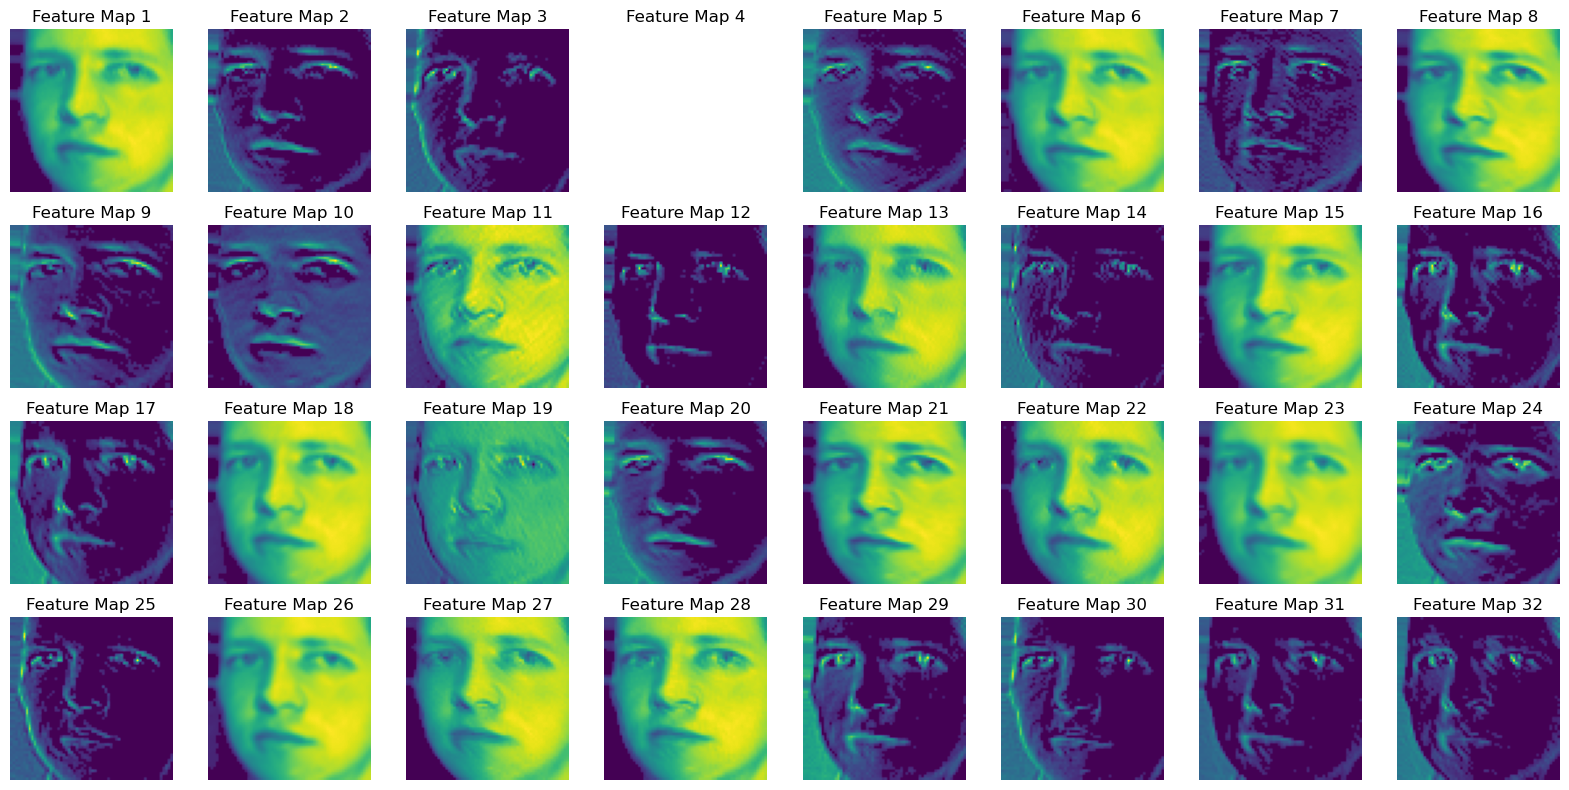

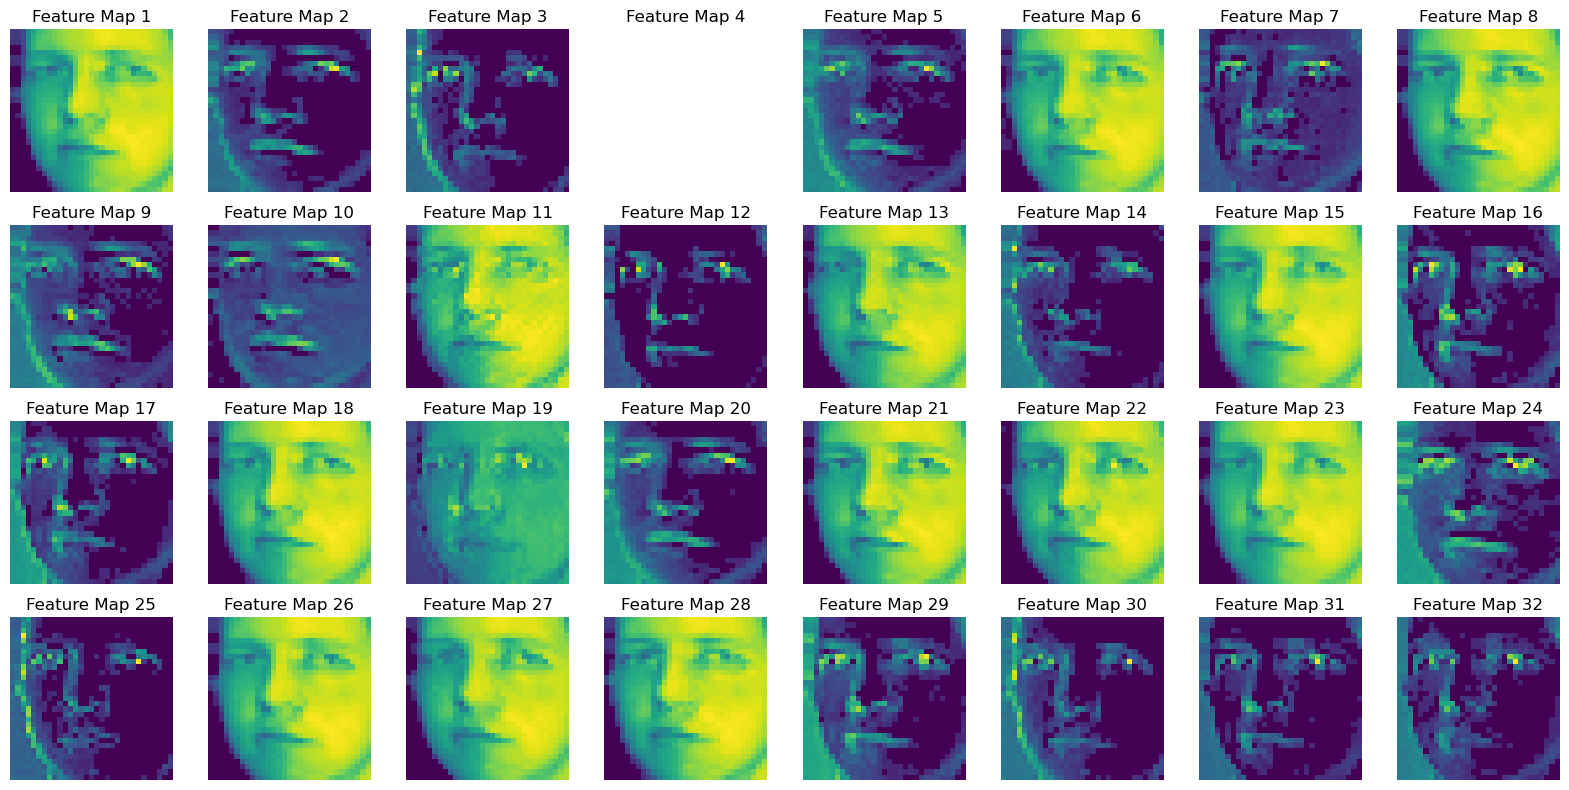

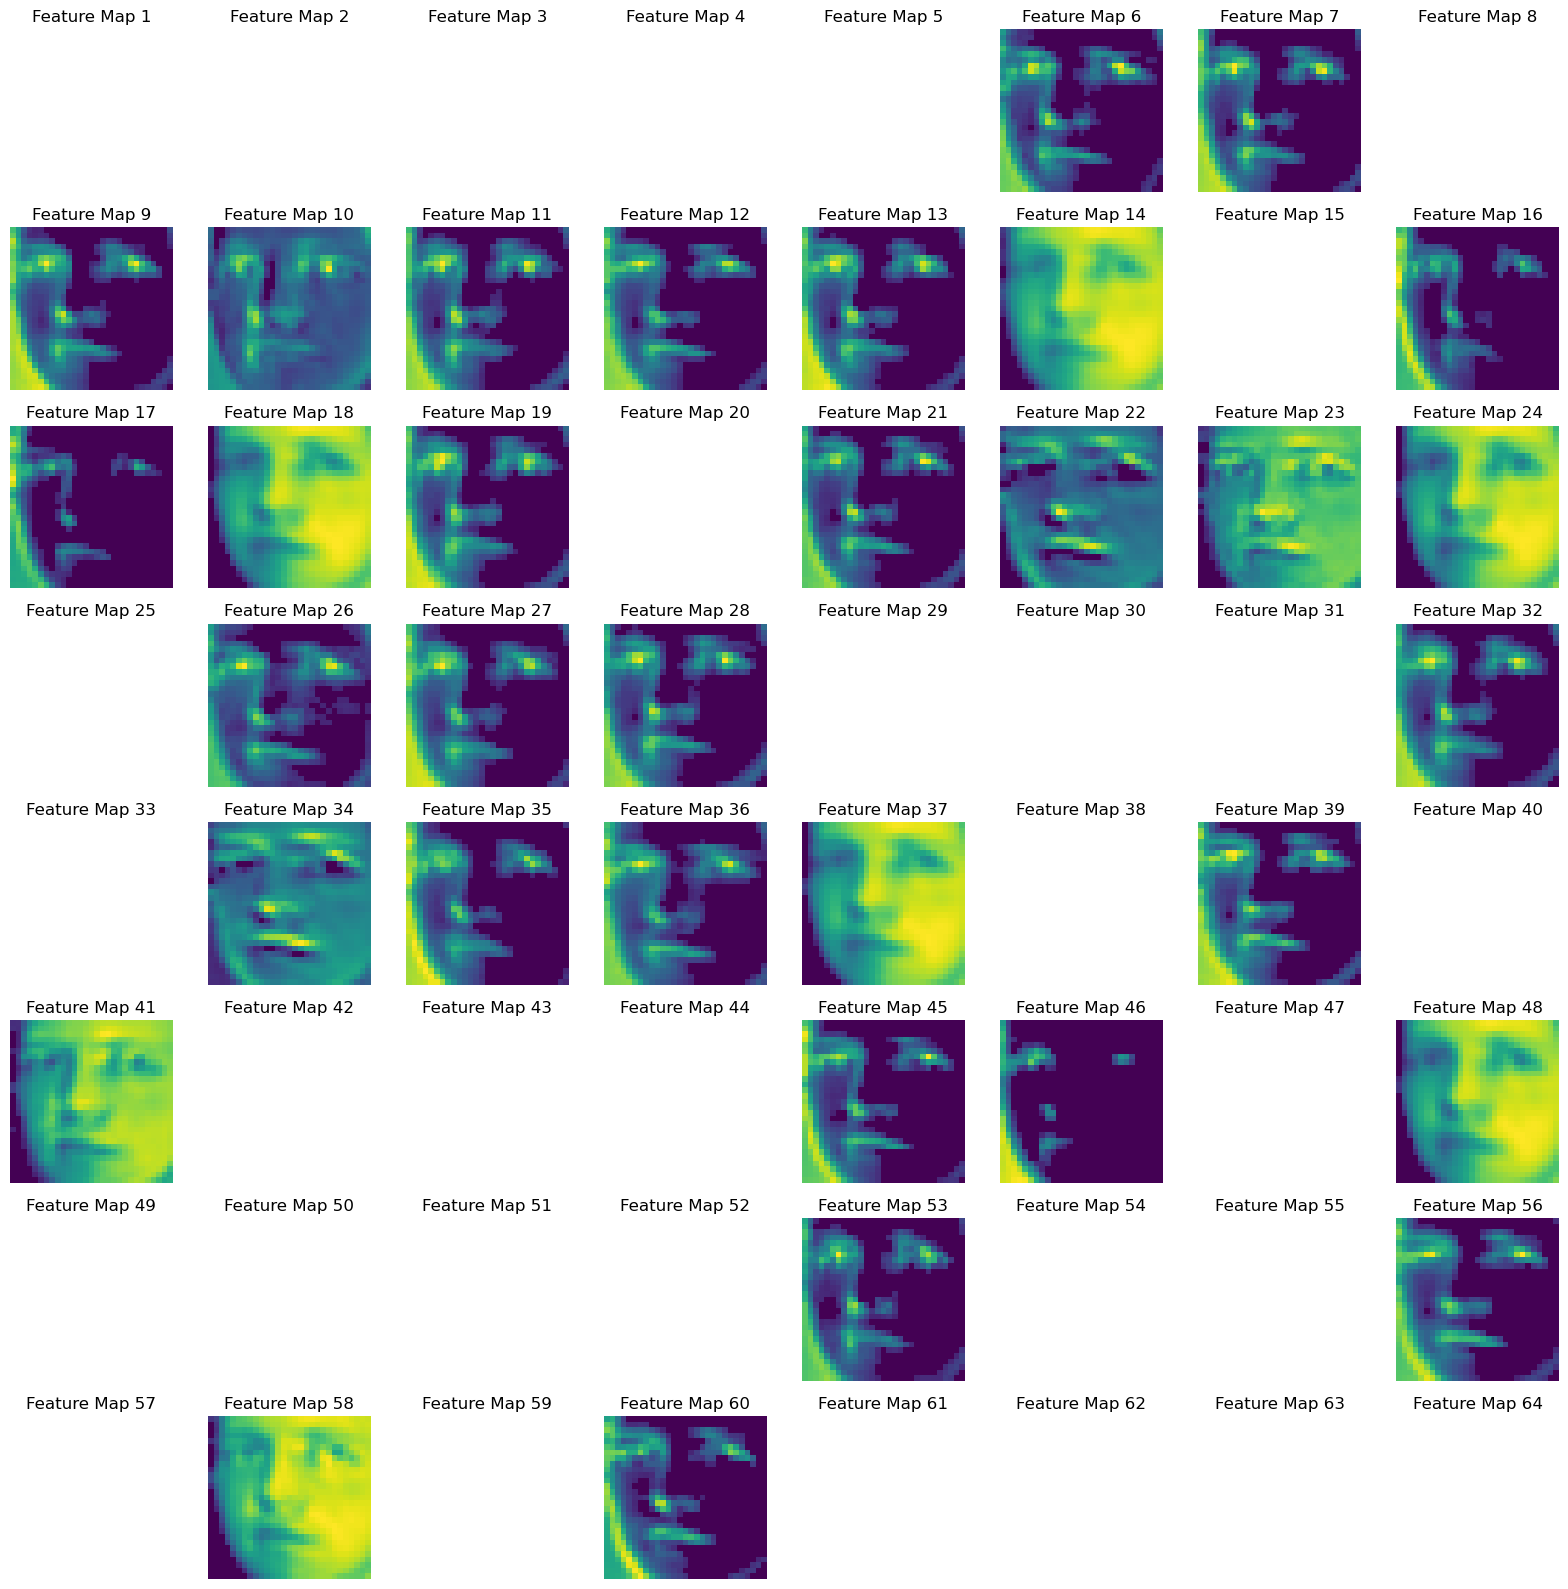

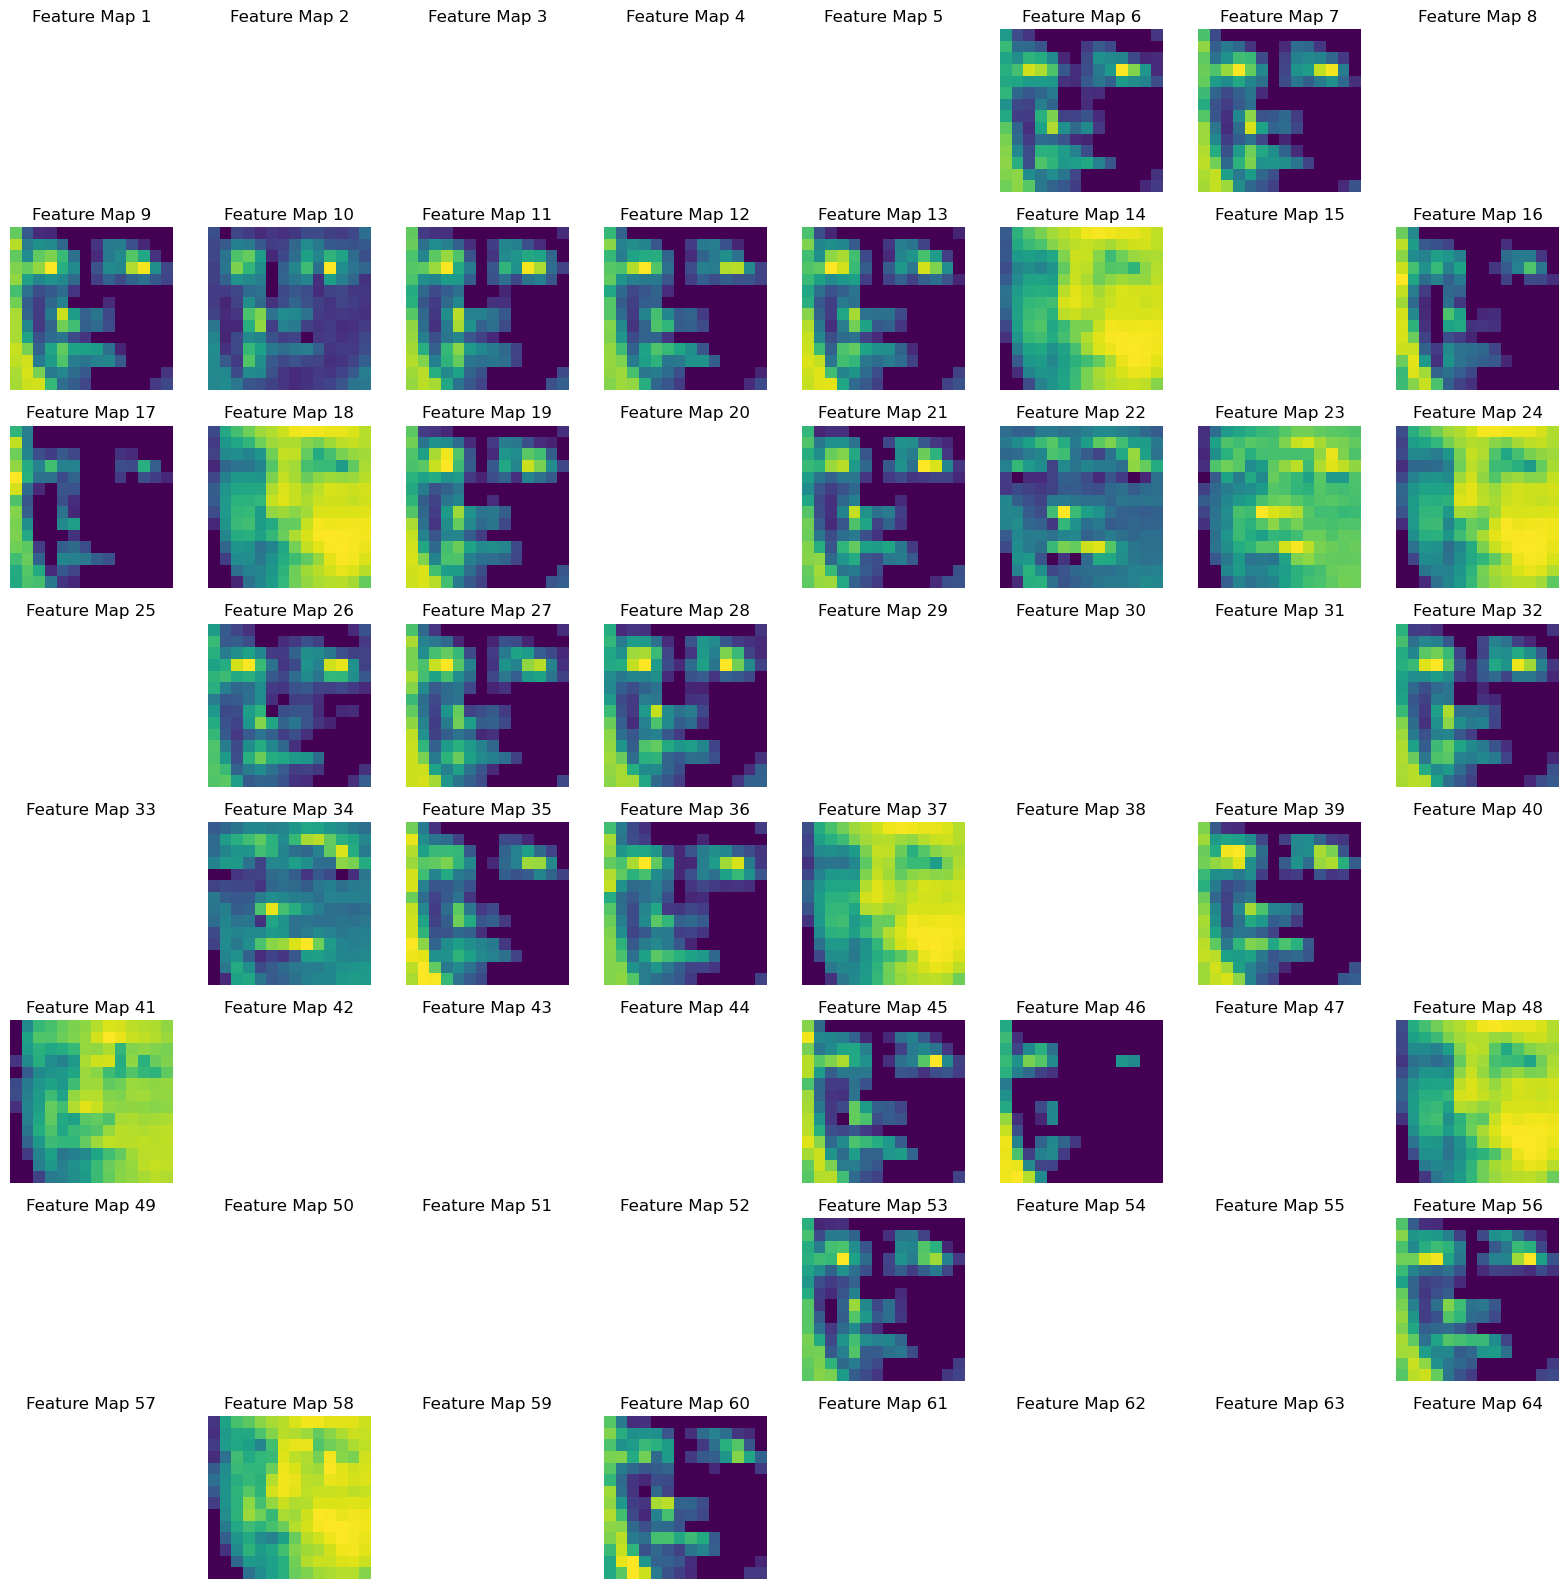

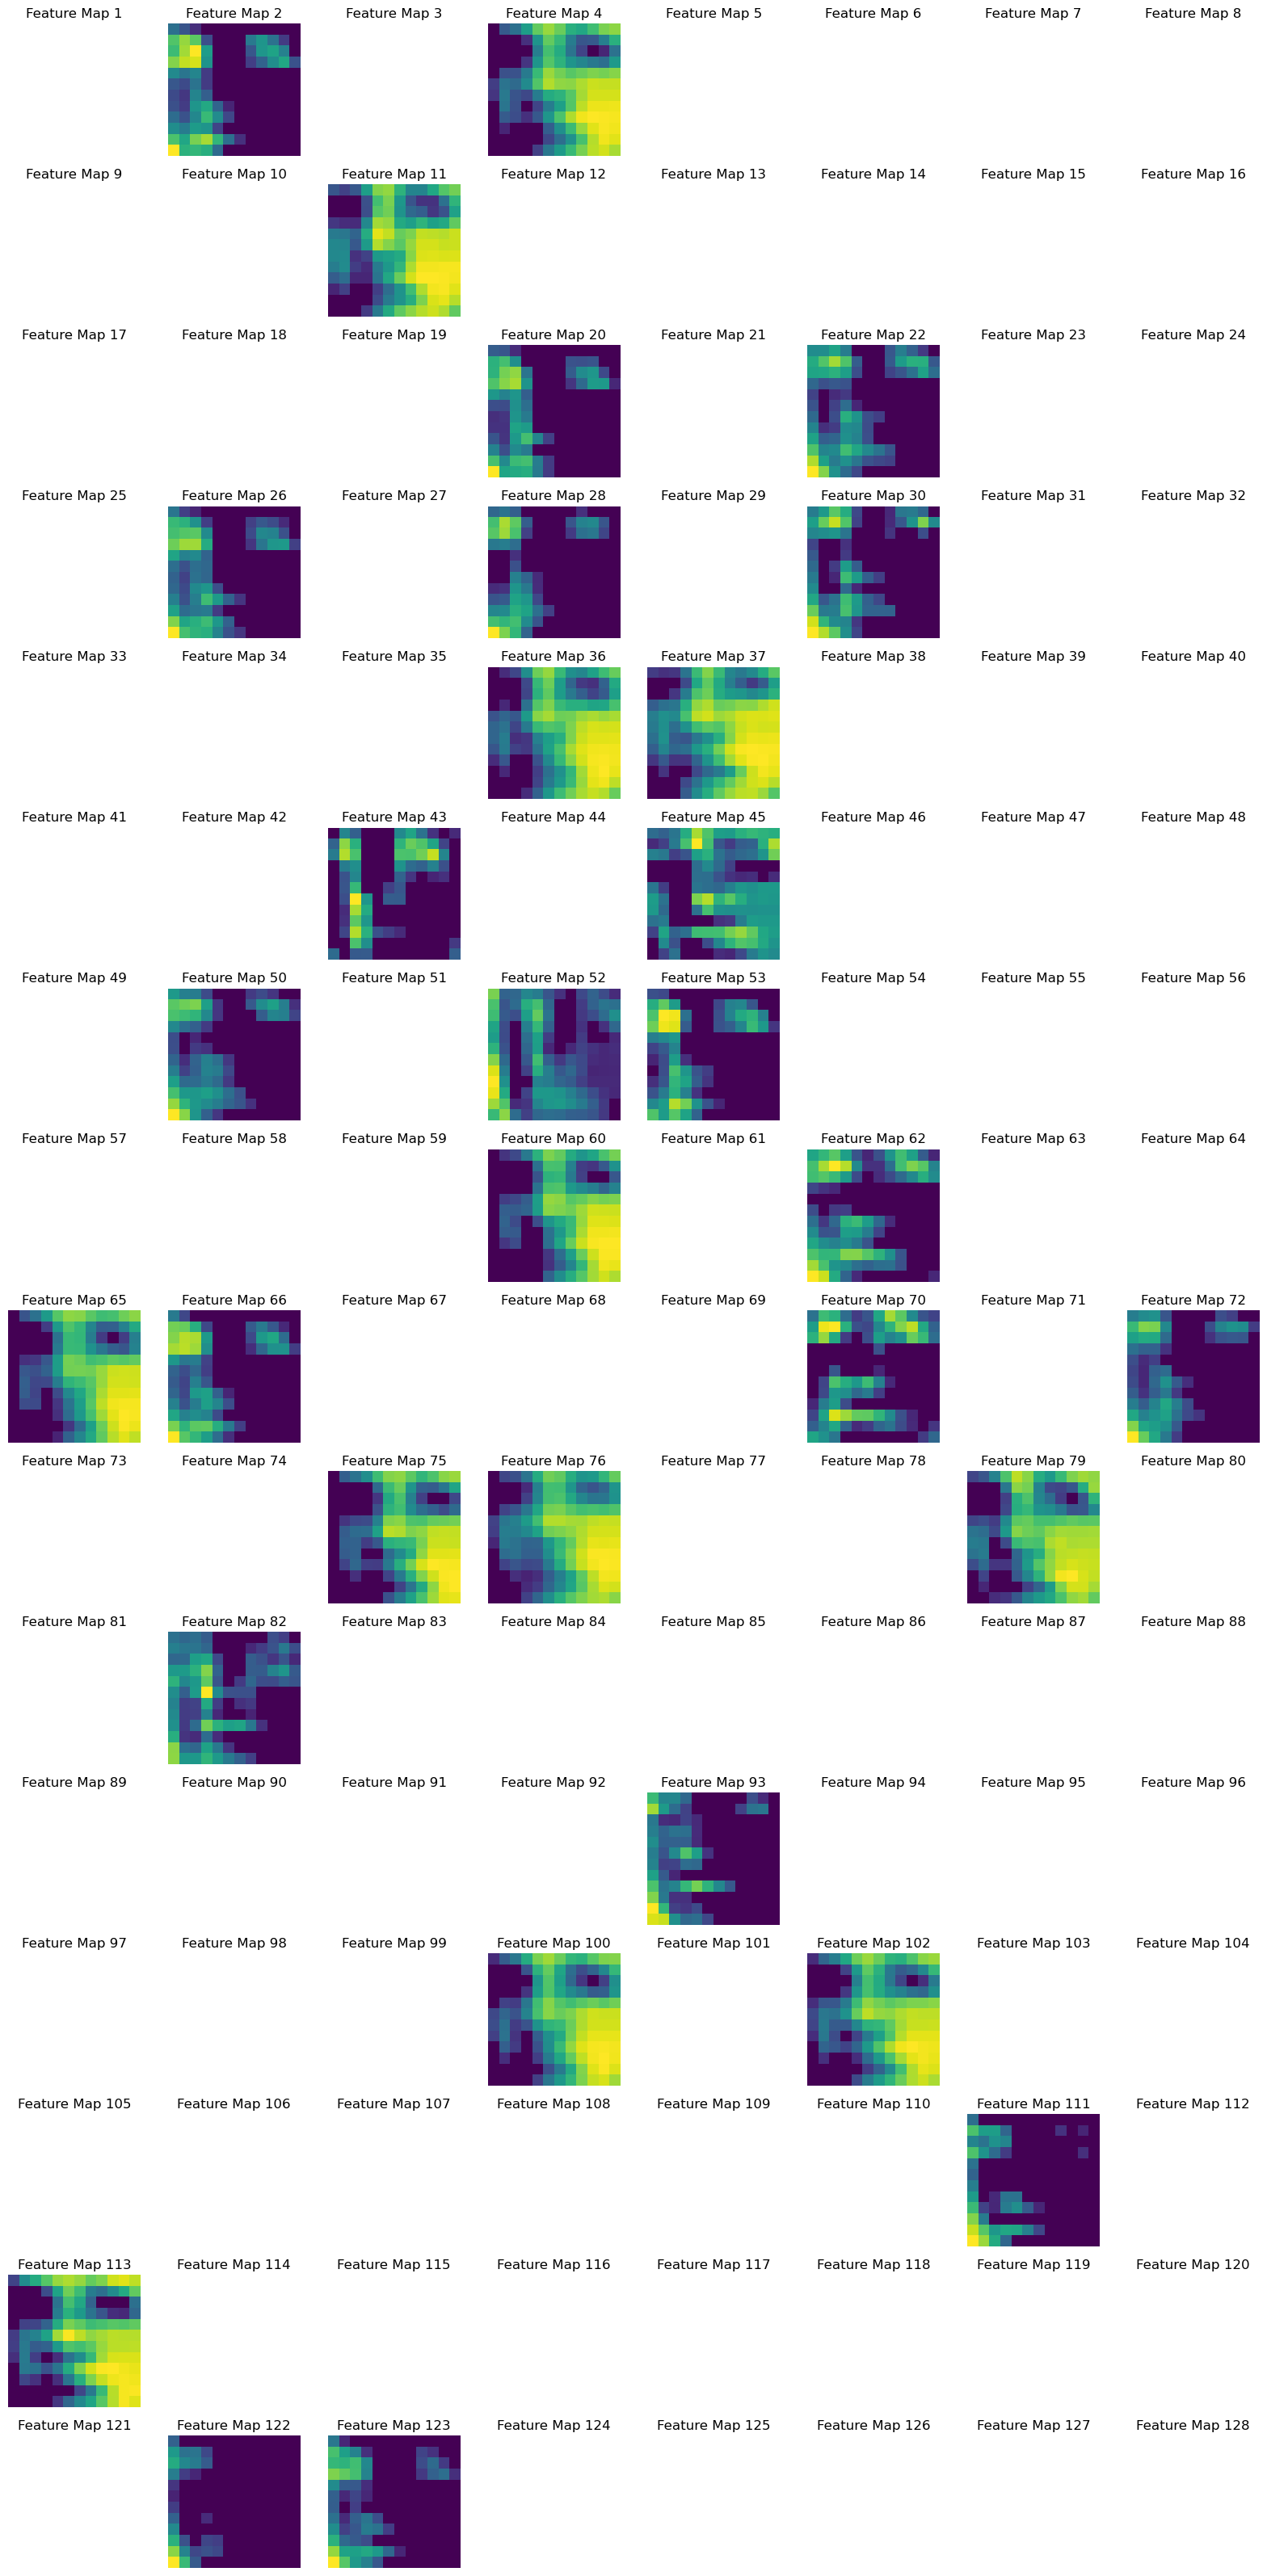

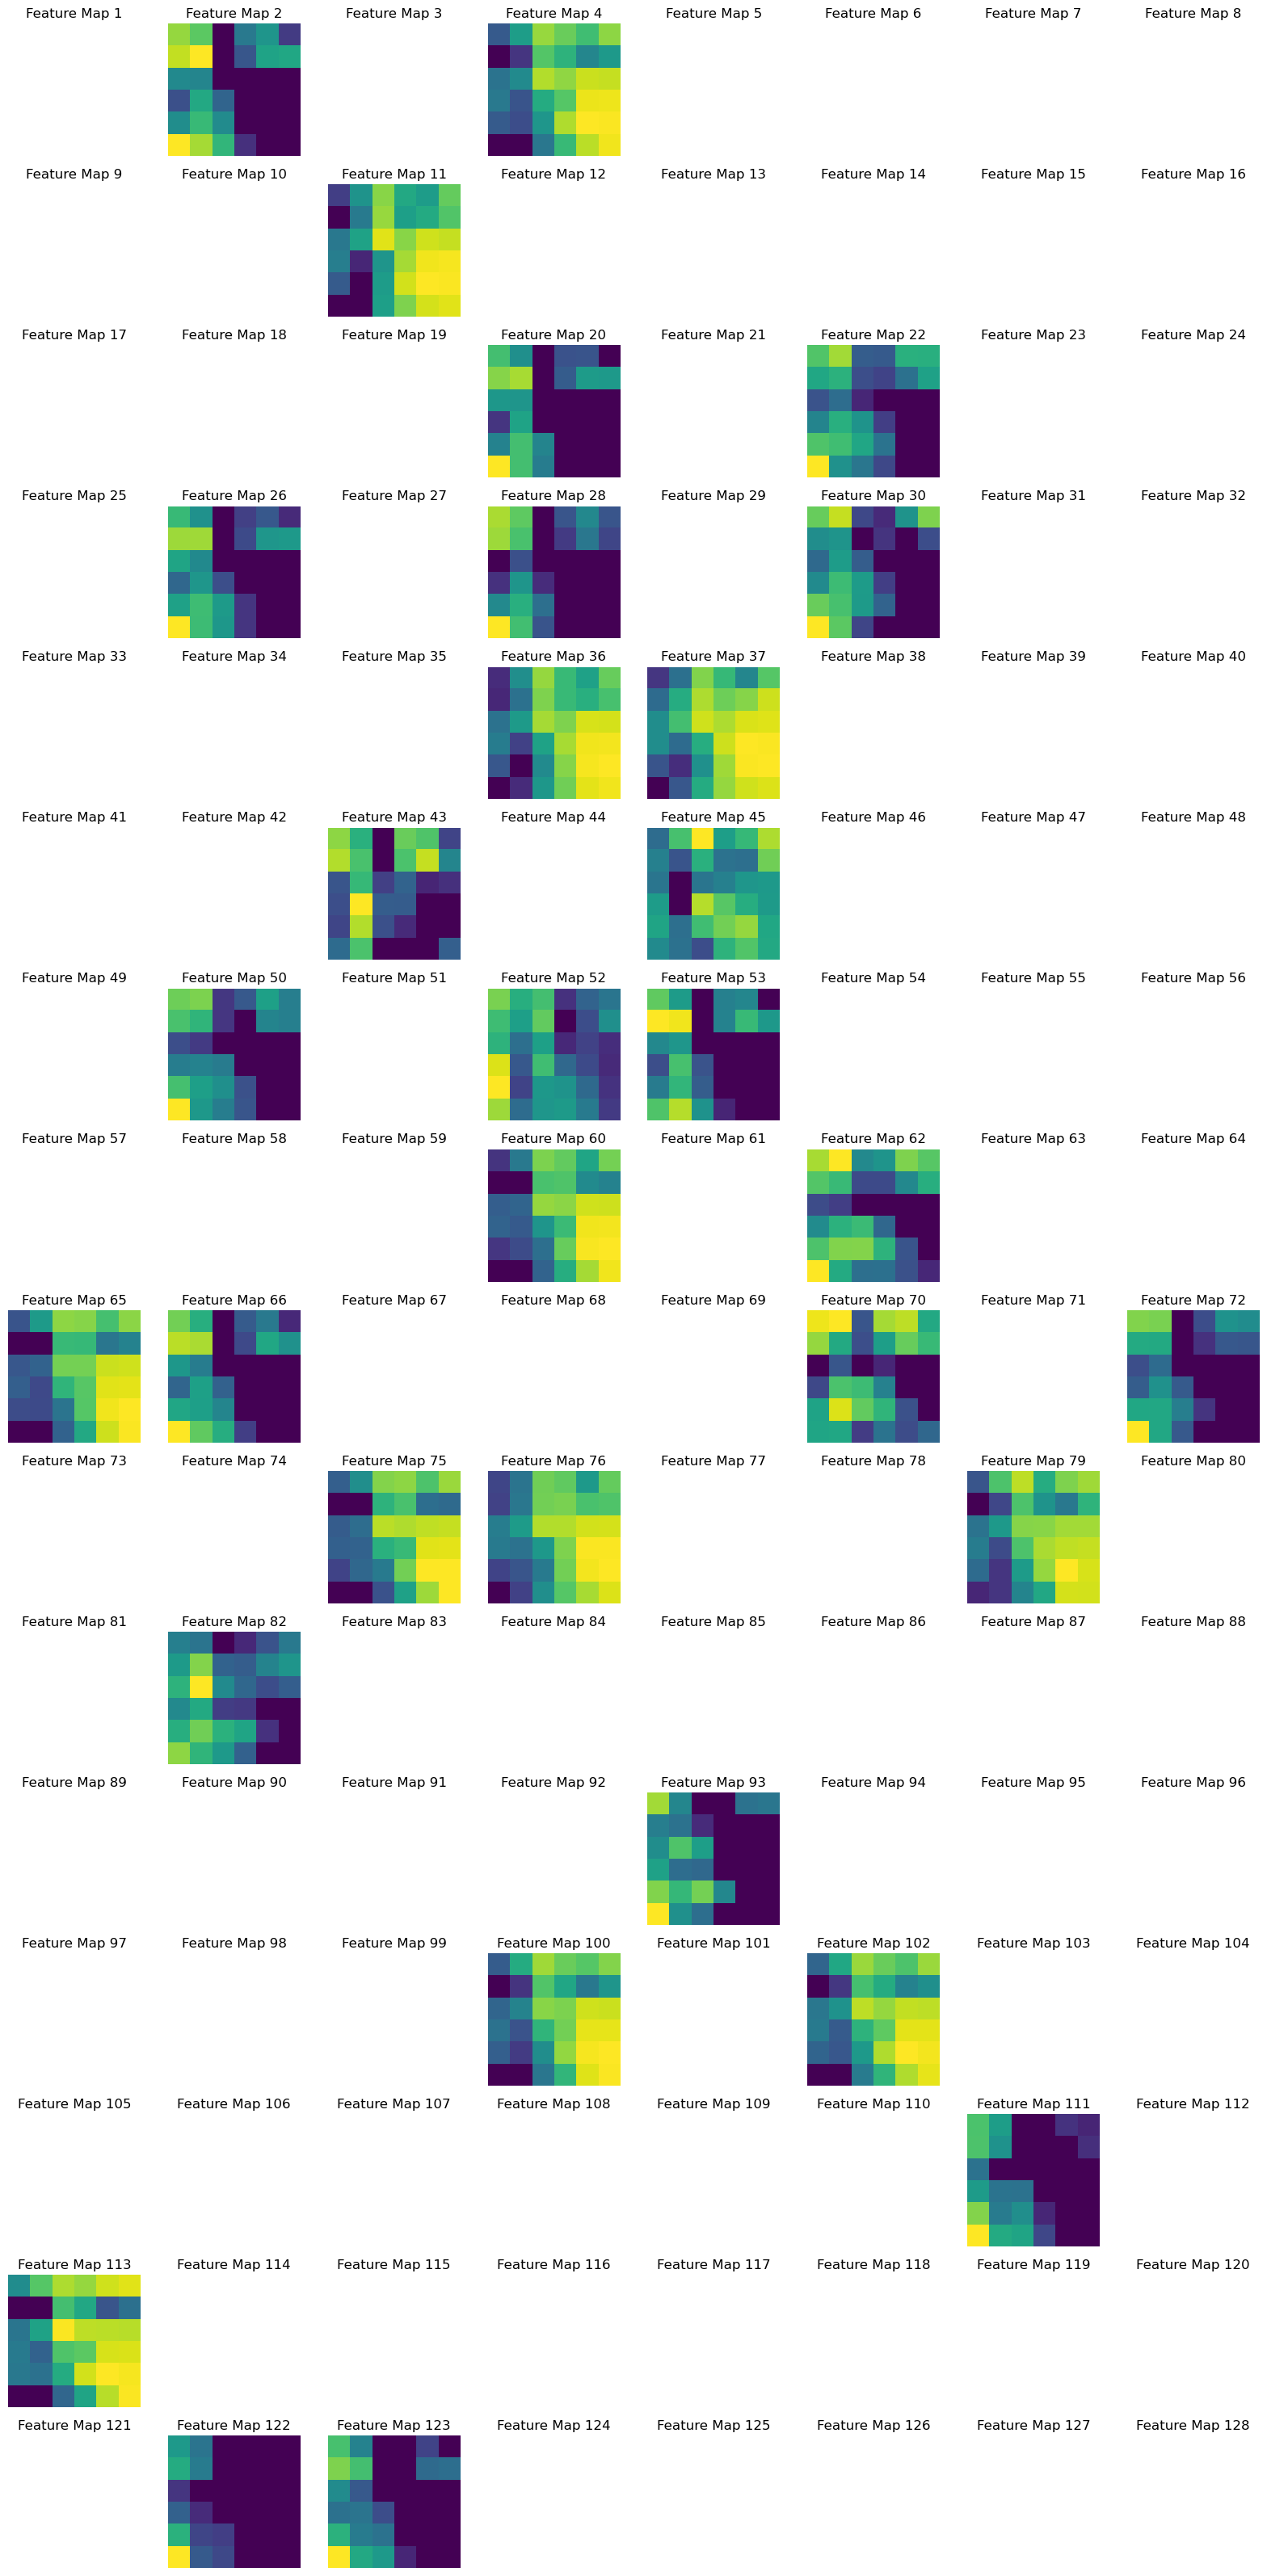

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

Error in callback <function _draw_all_if_interactive at 0x0000026C46D45B40> (for post_execute):


ValueError: Image size of 1600x115200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x115200 with 0 Axes>

In [16]:
# Method 2
# Visualize the feature maps for each convolutional layer
for i, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of filters in this layer
    num_columns = 8  # Maximum number of feature maps to show per row
    num_rows = (num_filters // num_columns) + (1 if num_filters % num_columns > 0 else 0)  # Calculate number of rows needed

    # Create a figure with a larger size for better visibility
    plt.figure(figsize=(num_columns * 2, num_rows * 2))

    for j in range(num_filters):
        # Get the feature map for the j-th filter
        feature_map_j = feature_map[0, :, :, j]

        # Check if the min and max values are equal (i.e., constant feature map)
        if feature_map_j.min() == feature_map_j.max():
            # If the feature map is constant, replace it with zeros (blank image)
            feature_map_j = np.zeros_like(feature_map_j)
        else:
            # Normalize the feature map to the range [0, 1] for better visualization
            feature_map_j = (feature_map_j - feature_map_j.min()) / (feature_map_j.max() - feature_map_j.min())

            # Optional: Apply thresholding to filter out very small values (helps visualize faint activations)
            feature_map_j[feature_map_j < 0.1] = 0  # Threshold small activations (adjust this value as needed)

        # Create a subplot for each feature map
        plt.subplot(num_rows, num_columns, j + 1)
        plt.imshow(feature_map_j, cmap='viridis')  # Use 'viridis' color map for better contrast
        plt.axis('off')  # Turn off axis
        plt.title(f'Feature Map {j + 1}')

    # Adjust layout and show the feature maps
    plt.tight_layout()
    plt.show()
